# Introduction aux SVM

## Implémentation des SVM

Les SVM reposent sur la résolution d'un problème d'optimisation quadratique convexe (formulation duale) de taille le nombre d'exemples de la base d'aprentissage. Bien qu'il existe des algorithmes spécifiques aux SVM (Sequential Minimal Optimization,...), il faut garder à l'esprit que la résolution d'un tel problème a une complexité au moins en $\mathcal{O}(n^2)$ où $n$ est le nombre d'exemples.

Néanmoins, dans le cas linéaire, il existe des implémentations de la descente de gradient stochastique (comme poour la régression logistique et les réseaux de neurones), qui, si elles convergent moins bien, ont toutefois une complexité en $\mathcal{O}(n)$ et donc permettent de traiter des problèmes de grande taille.

La difficulté majeure des SVM est le réglage du paramètre de régularisation (souvent appelé $C$) dans tous les cas et dans le cas non linéaire le réglage du noyau (le noyau exponentiel le plus simple fait par exemple apparaître le paramètre $\gamma$).

Pour les règler, on procède comme pour les algorithmes de Machine Learning, on va tester des valeurs différentes de ces hyperparamètres. Pour chacune de ces valeurs, on va estimer l'erreur de généralisation (via la validation croisée). Il est malheureusement notoire que les SVM (notamment non linéaire) n'apprennent bien que pour une gamme de valeurs d'hyperparamètres restreinte, aussi est-il important de chercher efficacement les meilleurs hyperparamètres. Il est courant d'échantillonner de manière très large les valeurs de $C$ et des paramètres du noyau.

Tout ceci nous conduit à la nécessité de disposer d'implémentations efficaces des SVM, il en existe quelques unes :
- `libsvm`, librairie en C++ wrappée en Python dans `sklearn` dans le module `svm`, qui traite les SVM non linéaires
- `liblinear`, librairie associée à la précédente qui traite les SVM linéaires et la Regression Logistique et implémente des méthodes d'optimisation dédiées (pour les SVM mais aussi pour la Régression Logistique) wrappée en Python dans le module `LinearSVC` de `sklearn`
- `SGDClassifier` qui provient d'une implémentation d'une Stochastic Gradient Descent pour les SVM par L. Bottou `svmsgd`

## Introduction à la classification avec `scikit-learn`

In [1]:
from sklearn import svm, metrics, datasets

In [2]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Nous utilisons l'exemple du cours : les données sur les iris

In [8]:
iris = sns.load_dataset('iris')

Regardons la description des données

In [9]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Il y a 4 variables d'entrée et une classe

In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


Pairplot

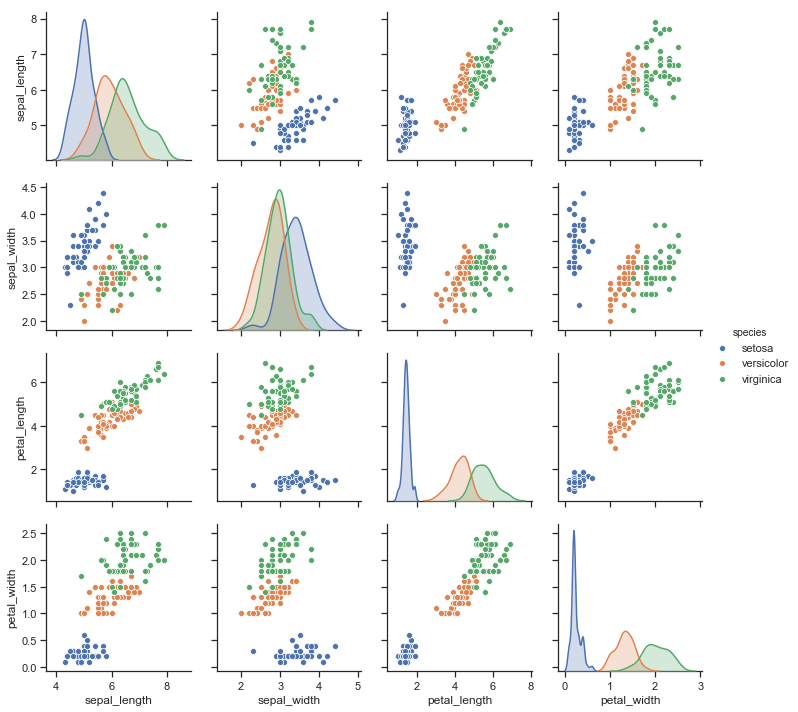

In [12]:
sns.pairplot(iris, hue="species")

Traçons les données

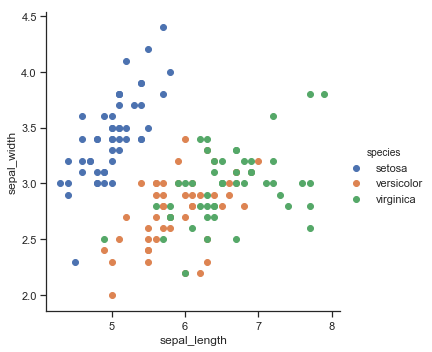

In [13]:
sns.FacetGrid(iris, hue="species",height=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()

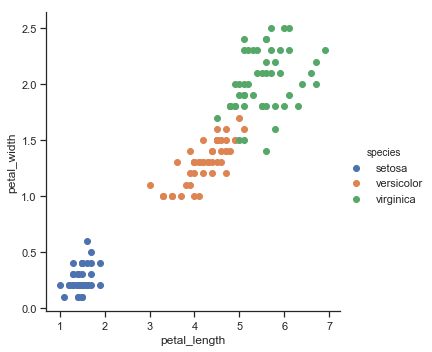

In [14]:
sns.FacetGrid(iris, hue="species", height=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

Séparons les 150 données en 75 données d'apprentissage et 75 de test

In [15]:
from sklearn.model_selection import train_test_split

Cette dernière fonction est très simple

In [16]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, **options)
    Split arrays or matrices into random train and test subsets
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float, int or None, optional (default=0.25)
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to the
        complement of the train size. By default, 

In [17]:
x=iris.iloc[:,:-1]
y=iris.iloc[:,4]
X_train,X_test, y_train, y_test=train_test_split(x,y,test_size=0.50)

Construisons une SVM pour la classification des données avec un coût pour une mauvaise classification C très elevé

In [18]:
svm_iris=svm.SVC(kernel='linear',C=1000000000)

In [19]:
svm_iris.fit(X_train,y_train)

SVC(C=1000000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Faisons maintenant la prédiction sur la base de test

In [20]:
y_pred=svm_iris.predict(X_test)

Traçons la matrice de confusion

In [21]:
cm = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[25  0  0]
 [ 0 20  0]
 [ 0  4 26]]


Examinons les vecteurs de support

In [22]:
svm_iris.support_vectors_

array([[5.7, 3.8, 1.7, 0.3],
       [5.1, 3.3, 1.7, 0.5],
       [6.7, 3. , 5. , 1.7],
       [5.1, 2.5, 3. , 1.1],
       [6. , 2.7, 5.1, 1.6],
       [6.2, 2.8, 4.8, 1.8],
       [6.1, 3. , 4.9, 1.8],
       [6.1, 2.6, 5.6, 1.4]])

**Exercice** : Tester avec d'autres noyaux et d'autres valeurs de C

## Introduction à la régression avec `scikit-learn`

Pour cette introduction à la régression avec les SVR, on va utiliser un dataset classique en régression: `Pima Diabetes Dataset`

In [23]:
from sklearn import datasets
diab = datasets.load_diabetes()

`scikit-learn` dispose de quelques datasets classiques. Ce dernier vient d'une étude très connue sur l'apparition du diabète sur des femmes indiennes.

In [24]:
print(diab.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

In [25]:
X = diab.data
y = diab.target

On commence par séparer les données en base d'apprentissage et base de test.
*NB* : la base de test est à oublier pendant toute la construction du modèle, elle ne sera appelée à la toute fin, une fois le modèle final entraîné. Ces données correspondent à ce que notre modèle prédictif mis en production aurait comme entrées.

In [26]:
from sklearn.model_selection import train_test_split

On choisit de garder $20 \%$ de points dans une base de test.

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [28]:
X_train.shape

(353, 10)

In [29]:
from sklearn.model_selection import GridSearchCV

`GridSearchCV` va nous permettre de procéder à une validation croisée directement sans avoir à la programmer (même si ça n'a rien de compliqué)

On commence par initier une instance de SVM pour la régression

In [30]:
from sklearn.svm import SVR

In [38]:
clf_svm = SVR()

Il s'agit d'un objet régresseur SVM qui comprend déjà beaucoup d'attributs et de méthodes

In [39]:
clf_svm.kernel

'rbf'

In [40]:
clf_svm.C

1.0

In [41]:
clf_svm.gamma

'auto_deprecated'

In [42]:
clf_svm.epsilon

0.1

On a donc un objet permettant de réaliser une régression en s'appuyant sur les RBF kernel SVM avec des paramètres de régularisation et de noyau (méthode de réglage automatique)

## Entraînement

Pour entraîner cet objet sur les données

In [43]:
clf_svm.fit(X_train, Y_train)

C:\Users\lefebvre\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

On peut déjà estimer le score sur la base d'apprentissage

In [44]:
clf_svm.score(X_train, Y_train)

-0.021821874255633533

In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\lefebvre\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['cm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


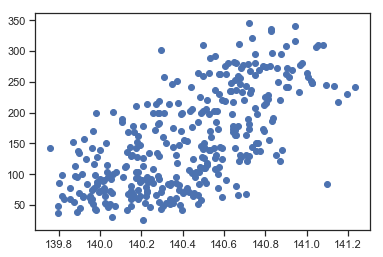

In [46]:
plt.plot(clf_svm.predict(X_train), Y_train,'o')

La régression n'est pas très efficace, elle donne quasiment la même valeur pour tous les échantillons. La meilleure solution est de parcourir l'espace des hyperparamètres et de réaliser pour chaque combinaison une estimation de l'erreur de généralisation par validation croisée.

In [47]:
gammas = np.logspace(0.5,1,5)
Cs     = np.logspace(1.7,2.5,5)
epsilons = np.logspace(0.2,0.7,5)

param_dict = [{'gamma': gammas, 'C': Cs, 'epsilon': epsilons}]
cv_svr = GridSearchCV(clf_svm, param_dict, cv = 5, refit=True)

In [48]:
cv_svr.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'gamma': array([ 3.16228,  4.21697,  5.62341,  7.49894, 10.     ]), 'C': array([ 50.11872,  79.43282, 125.89254, 199.52623, 316.22777]), 'epsilon': array([1.58489, 2.11349, 2.81838, 3.75837, 5.01187])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

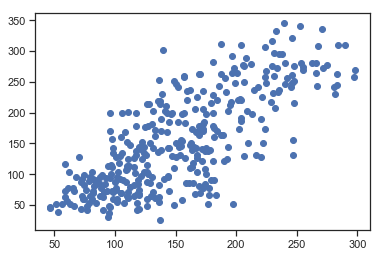

In [49]:
plt.plot(cv_svr.predict(X_train), Y_train,'o')

La régression s'est largement améliorée.

**Exercice 1** : Estimer l'erreur de généralisation à l'aide de la base de test.

**Exercice 2** : Tester avec d'autres noyaux

**Exercice 3** : Tester avec des SVR linéaires

**Exercice final** :  Choisir les hyperparamètres par validation croisée pour la classification des iris